# P set2
## P2

In [2]:
import numpy as np
import sympy as sym
from sympy import sin,cos
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

## b

In [3]:
def diff(domainl=4,cum_tsteps=1000,deltax=0.05,deltat=0.05,difftype="forward-upwind"):
    # initial domain

    # domainl = 4.    # diff区域
    # cum_t   = 40.   # 总的积分时间
    # deltax  = 0.05 
    # deltat  = 0.05
    gridn   = int(domainl / deltax) + 1
    gridt   = cum_tsteps
    print("积分时间长度:",cum_tsteps*deltat,"s")
    # gridt   = int(cum_t/deltat)     + 1
    # print(gridn)
    # print(gridt)
    # initial dye c -pulse
    c = np.zeros([gridn,gridt])
    print("check output c shape: ",c.shape)
    c[1:int(0.5/deltax)+1,0] = 1

    u = 1.  # advection volicity

    cr = u*deltat/deltax
    print("check cr = ",cr)
    if (difftype=="forward-upwind"):
        for j in range(0,gridt-1):
            c[0,j] = c[gridn-1,j] # 周期边界条件
            for i in range(1,gridn): #Notice the limits here
                c[i,j+1] =  c[i,j] - cr * (c[i,j]-c[i-1,j]); #first order forward

    if (difftype=="forward-central"):
        print("diff type is ","forward-central")
        for j in range(0,gridt-1):
            c[0,j+1] = c[0,j] - cr/2.0* (c[1,j]-c[gridn-1,j]) # 周期边界条件,二阶直接把两边连起来计算
            c[gridn-1,j+1] = c[gridn-1,j] - cr/2.0* (c[0,j]-c[gridn-2,j])
            for i in range(1,gridn-1): #Notice the limits here
                c[i,j+1] =  c[i,j] - cr/2.0 * (c[i+1,j]-c[i-1,j]); #first order forward

    return c

            # dfdx_2nd[i] =  (f[i+1]-f[i-1])/deltax/2; #second order central
            # dfdx_4th[i] =  (f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2])/12./deltax; #fourth order central

### upwind + forward count

In [4]:
domainl = 4. 
cum_t   = 200.
deltax  = 0.05
deltat  = 0.05
gridn   = int(domainl / deltax) + 1
gridt   = int(cum_t/deltat)     + 1
c_result =diff(difftype='forward-upwind')

积分时间长度: 50.0 s
check output c shape:  (81, 1000)
check cr =  1.0


Text(0, 0.5, 'c')

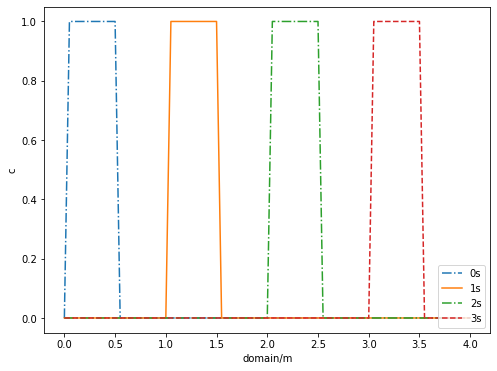

In [5]:
fig,ax = plt.subplots(1,figsize=(8,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.plot(np.linspace(0,domainl,gridn), c_result[:,0],'-.', label='0s')
ax.plot(np.linspace(0,domainl,gridn), c_result[:,int(1./deltat)],'-', label='1s')
ax.plot(np.linspace(0,domainl,gridn), c_result[:,int(2./deltat)],'-.', label='2s')
ax.plot(np.linspace(0,domainl,gridn), c_result[:,int(3/deltat)],'--', label='3s')
ax.legend(loc='lower right')
plt.xlabel('domain/m')
plt.ylabel('c')
    # ax[nn].legend(')

## c
<br> 更改cr number，让deltax保持不变,绘制t=2s的图

In [6]:
cr_b = np.array([0.5,0.99,1.01])
gridn = np.empty(cr_b.shape,dtype='int')
gridt = np.empty(cr_b.shape,dtype='int')
domainl = 4. 
# cum_t   = 200. # count time (realization)
deltax  = np.array([0.05])
deltat  = cr_b*deltax
gridn   = (domainl/deltax) + 1
#  因为时间不怎么均匀，所以直接选取计算总的时间步为1000步
gridt   = 1000

In [7]:
cr_b = np.array([0.5,0.99,1.01])
gridn = np.empty(cr_b.shape,dtype='int')
# gridt = np.empty(cr_b.shape,dtype='int')
domainl = 4. 
deltax  = np.array([0.05])
deltat  = cr_b*deltax
gridn   = (domainl/deltax) + 1
gridt   = 1000
# print(gridt)
c_result_b = []
# def diff(domainl=4,cum_tsteps=1000,deltax=0.05,deltat=0.05,difftype="forward-upwind"):
for i in range(0,3):
    print("-----开始cr = ",cr_b[i]," 的积分-----")
    c_result_b.append(diff(deltat=deltat[i],difftype='forward-upwind'))

plot_time = 2. # 绘制图的时间
# plot_time_ind = np.empty(cr_b.shape,dtype='int')
plot_time_ind = plot_time/deltat # 对应ind
plot_time_ind = plot_time_ind.astype(np.int16)
print(plot_time_ind)

-----开始cr =  0.5  的积分-----
积分时间长度: 25.0 s
check output c shape:  (81, 1000)
check cr =  0.5
-----开始cr =  0.99  的积分-----
积分时间长度: 49.5 s
check output c shape:  (81, 1000)
check cr =  0.99
-----开始cr =  1.01  的积分-----
积分时间长度: 50.5 s
check output c shape:  (81, 1000)
check cr =  1.01
[80 40 39]


Text(0, 0.5, 'c')

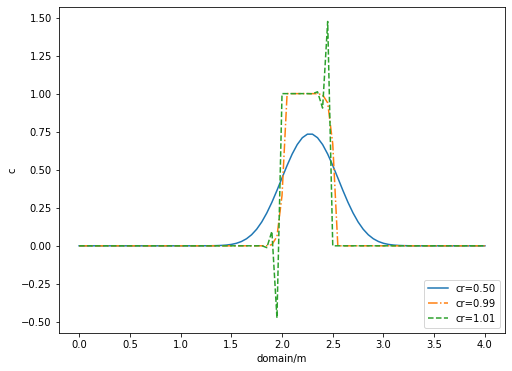

In [8]:

fig,ax = plt.subplots(1,figsize=(8,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.plot(np.linspace(0,4,81), c_result_b[0][:,plot_time_ind[0]],'-', label='cr=0.50')
ax.plot(np.linspace(0,4,81), c_result_b[1][:,plot_time_ind[1]],'-.', label='cr=0.99')
ax.plot(np.linspace(0,4,81), c_result_b[2][:,plot_time_ind[2]],'--', label='cr=1.01')
ax.legend(loc='lower right')
plt.xlabel('domain/m')
plt.ylabel('c')
    # ax[nn].legend(')

## d
<br>使用空间中央差是绝对不稳定的，这里将时间间隔调得很小，让误差增幅没太夸张（已经很夸张了）

In [9]:
domainl = 4. 
deltax  = 0.025
deltat  = 0.025
gridn   = (domainl/deltax) + 1
c_result_c = diff(cum_tsteps=10000,deltat=deltat,deltax=deltax,difftype="forward-central")

积分时间长度: 250.0 s
check output c shape:  (161, 10000)
check cr =  1.0
diff type is  forward-central


Text(0, 0.5, 'c')

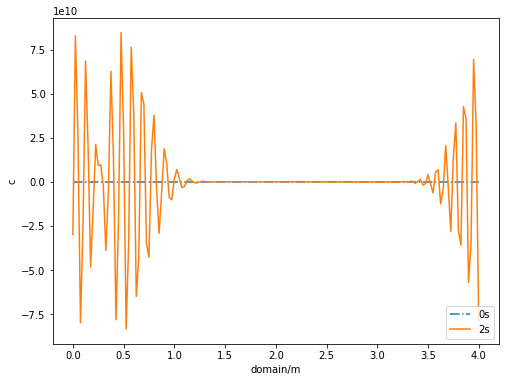

In [10]:
fig,ax = plt.subplots(1,figsize=(8,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.plot(np.linspace(0,domainl,int(gridn)), c_result_c[:,0],'-.', label='0s')
ax.plot(np.linspace(0,domainl,int(gridn)), c_result_c[:,int(2.0/deltat)],'-', label='2s')
# ax.plot(np.linspace(0,domainl,gridn), c_result_c[:,int(2./deltat)],'-.', label='2s')
# ax.plot(np.linspace(0,domainl,gridn), c_result_c[:,int(3./deltat)],'--', label='3s')
ax.legend(loc='lower right')
plt.xlabel('domain/m')
plt.ylabel('c')
    # ax[nn].legend(')